<a href="https://colab.research.google.com/github/LaraDondossola/Projeto_estatistica_aplicada/blob/main/codigo_projeto_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# --- 1. LEITURA DE DADOS (MODIFICADO PARA INCLUIR TODOS OS PARTICIPANTES) ---
dados_participantes = pd.read_csv("PARTICIPANTES_2024.csv", sep=";", encoding="latin1")

dados_participantes["TP_FAIXA_ETARIA"] = dados_participantes["TP_FAIXA_ETARIA"].astype("category")

In [ ]:
# --- 2. MAPAS DE TRADUÇÃO (TODOS CORRETOS) ---

# Mapeamento COMPLETO para Renda Familiar (Q007)
mapa_renda = {
    "A": "Nenhuma Renda",
    "B": "Até R$ 1.412,00",
    "C": "De R$ 1.412,01 até R$ 2.118,00",
    "D": "De R$ 2.118,01 até R$ 2.824,00",
    "E": "De R$ 2.824,01 até R$ 3.530,00",
    "F": "De R$ 3.530,01 até R$ 4.236,00",
    "G": "De R$ 4.236,01 até R$ 5.648,00",
    "H": "De R$ 5.648,01 até R$ 7.060,00",
    "I": "De R$ 7.060,01 até R$ 8.472,00",
    "J": "De R$ 8.472,01 até R$ 9.884,00",
    "K": "De R$ 9.884,01 até R$ 11.296,00",
    "L": "De R$ 11.296,01 até R$ 12.708,00",
    "M": "De R$ 12.708,01 até R$ 14.120,00",
    "N": "De R$ 14.120,01 até R$ 16.944,00",
    "O": "De R$ 16.944,01 até R$ 21.180,00",
    "P": "De R$ 21.180,01 até R$ 28.240,00",
    "Q": "Acima de R$ 28.240,00"
}

# Mapeamento para Q020 (Geladeira)
mapa_q020 = { "A": "Não", "B": "Sim" }

# Mapeamento para Q021 (Computador/Notebook)
mapa_q021 = {
    "A": "Não", "B": "Sim, um", "C": "Sim, dois", "D": "Sim, três", "E": "Sim, quatro ou mais"
}

# Mapeamento para Q022 (Celular)
mapa_q022 = {
    "A": "Não", "B": "Sim, um", "C": "Sim, dois", "D": "Sim, três ou mais", "E": "Sim, quatro ou mais"
}

# Mapeamento para Q023 (Tipo de Escola Ensino Médio)
mapa_q023 = {
    "A": "Somente em escola pública",
    "B": "Parte em escola pública e parte em escola privada sem bolsa de estudo integral",
    "C": "Parte em escola pública e parte em escola privada com bolsa de estudo integral",
    "D": "Somente em escola privada sem bolsa de estudo integral",
    "E": "Somente em escola privada com bolsa de estudo integral",
    "F": "Não frequentei escola de Ensino Médio"
}

# Mapeamento para TP_FAIXA_ETARIA (o original tinha um erro na referência à variável)
mapa_faixa_etaria = {
    1: "Menor de 17 anos", 2: "17 anos", 3: "18 anos", 4: "19 anos", 5: "20 anos",
    6: "21 anos", 7: "22 anos", 8: "23 anos", 9: "24 anos", 10: "25 anos",
    11: "Entre 26 e 30 anos", 12: "Entre 31 e 35 anos", 13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos", 15: "Entre 46 e 50 anos", 16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos", 18: "Entre 61 e 65 anos", 19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}

# Mapeamento para TP_ENSINO
mapa_ensino = { 1: "Ensino Regular", 2: "Educação Especial - Modalidade Substitutiva" }

# Mapeamento para Q001 e Q002 (Escolaridade dos pais)
mapa_escolaridade_pais = {
    "A": "Nunca estudou", "B": "Não completou a 4ª série/5º ano do Ensino Fundamental",
    "C": "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
    "D": "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
    "E": "Completou o Ensino Médio, mas não completou a Faculdade",
    "F": "Completou a Faculdade, mas não completou a Pós-graduação",
    "G": "Completou a Pós-graduação", "H": "Não sei"
}

# Mapeamento para Q003 e Q004 (Ocupação dos pais)
mapa_ocupacao_pais = {
    "A": "Grupo 1", "B": "Grupo 2", "C": "Grupo 3",
    "D": "Grupo 4", "E": "Grupo 5", "F": "Não sei"
}

# Mapeamento para Q011 (Nº de cômodos)
mapa_comodos = {
    "A": "Um", "B": "Dois", "C": "Três", "D": "Quatro", "E": "Cinco",
    "F": "Seis", "G": "Sete", "H": "Oito", "I": "Nove", "J": "Dez ou mais"
}

# --- 3. APLICAÇÃO DOS MAPAS (Aplicado ao DataFrame completo) ---
# A coluna "TP_FAIXA_ETARIA" foi definida como 'category' na etapa 1, agora mapeamos.
dados_participantes["TP_FAIXA_ETARIA"] = dados_participantes["TP_FAIXA_ETARIA"].map(mapa_faixa_etaria)

dados_participantes["TP_ENSINO"] = dados_participantes["TP_ENSINO"].map(mapa_ensino)
dados_participantes["Q001"] = dados_participantes["Q001"].map(mapa_escolaridade_pais)
dados_participantes["Q002"] = dados_participantes["Q002"].map(mapa_escolaridade_pais)
dados_participantes["Q003"] = dados_participantes["Q003"].map(mapa_ocupacao_pais)
dados_participantes["Q004"] = dados_participantes["Q004"].map(mapa_ocupacao_pais)
dados_participantes["Q007"] = dados_participantes["Q007"].map(mapa_renda)
dados_participantes["Q011"] = dados_participantes["Q011"].map(mapa_comodos)
dados_participantes["Q020"] = dados_participantes["Q020"].map(mapa_q020)
dados_participantes["Q021"] = dados_participantes["Q021"].map(mapa_q021)
dados_participantes["Q022"] = dados_participantes["Q022"].map(mapa_q022)
dados_participantes["Q023"] = dados_participantes["Q023"].map(mapa_q023)

In [ ]:
print("\n--- Informações do DataFrame completo após mapeamentos ---")
print(dados_participantes.info())

print("\n--- Amostra das primeiras 5 linhas do DataFrame completo ---")
print(dados_participantes.head(5))

In [ ]:
# --- 4. ESTATÍSTICA DESCRITIVA E VISUALIZAÇÃO ---

# Análise de Frequência e Proporção para Q007
# dropna=False para incluir NAs se existirem na Q007 após o mapeamento.
# (Porém, como 'A' é "Nenhuma Renda", é menos provável ter NaN aqui a menos que o dado original estivesse realmente vazio)
frequencia_renda = dados_participantes["Q007"].value_counts(dropna=False)
print("\n--- Frequência de Renda Familiar (Q007) ---")
print(frequencia_renda)

proporcao_renda = dados_participantes["Q007"].value_counts(normalize=True, dropna=False) * 100
print("\n--- Proporção (%) de Renda Familiar (Q007) ---")
print(proporcao_renda.round(2))

# Verificando a frequência de outras variáveis no DataFrame COMPLETO
variaveis = ["Q006","Q007","Q023","TP_FAIXA_ETARIA","TP_ENSINO","Q001","Q002","Q003","Q004","SG_UF_PROVA"]

for var in variaveis:
    print(f"\n--- Frequência de {var} (Todos os Participantes) ---")
    print(dados_participantes[var].value_counts(dropna=False))
    print(f"\n--- Proporção (%) de {var} (Todos os Participantes) ---")
    print((dados_participantes[var].value_counts(normalize=True, dropna=False) * 100).round(2))

In [ ]:
# --- 5. CRUZAMENTOS (Usando o DataFrame completo) ---
print("\n--- Renda Familiar (Q007) x Tipo de Escola (Q023) (Todos os Participantes) ---")
print(pd.crosstab(dados_participantes["Q023"], dados_participantes["Q007"], normalize="index")*100)

print("\n--- Renda Própria (Q006) x Escolaridade da mãe (Q001) (Todos os Participantes) ---")
print(pd.crosstab(dados_participantes["Q006"], dados_participantes["Q001"], normalize="index")*100)

print("\n--- Renda Familiar (Q007) x Estado de Residência (SG_UF_PROVA) (Todos os Participantes) ---")
print(pd.crosstab(dados_participantes["SG_UF_PROVA"], dados_participantes["Q007"], normalize="index")*100)

In [ ]:
# Geração do Gráfico de Barras (para as faixas de renda originais mapeadas, em todos os participantes)
plt.figure(figsize=(12, 7))
sns.countplot(
    data=dados_participantes, # Usando o DataFrame completo
    y="Q007",
    # O `order` garante que as faixas de maior frequência fiquem no topo
    order=dados_participantes["Q007"].value_counts().index,
    palette="viridis"
)
plt.title("Distribuição da Renda Familiar (Q007) - Todos os Estudantes")
plt.xlabel("Contagem de Participantes")
plt.ylabel("Faixa de Renda")
plt.tight_layout() # Garante que rótulos não se sobreponham
plt.show()

In [ ]:
# 1. Definir os Novos Grupos de Renda (função permanece a mesma, agora aplicada a todos os participantes)
# Esta é uma sugestão de agrupamento. Você pode ajustar os limites e os nomes como desejar.
# A chave é mapear as faixas de renda originais para os novos grupos.
def agrupar_renda(renda_str):
    # Tratar NaNs na coluna Q007 se houverem (após mapeamento e antes do agrupamento)
    if pd.isna(renda_str):
        return "Renda Não Informada" # Categoriza explicitamente NaNs, se houverem.
    elif renda_str == "Nenhuma Renda" or renda_str == "Até R$ 1.412,00":
        return "Até R$ 1.412,00 (Nenhuma ou Baixa Renda)"
    elif renda_str in ["De R$ 1.412,01 até R$ 2.118,00", "De R$ 2.118,01 até R$ 2.824,00"]:
        return "De R$ 1.412,01 até R$ 2.824,00 (Renda Baixa-Média)"
    elif renda_str in ["De R$ 2.824,01 até R$ 3.530,00", "De R$ 3.530,01 até R$ 4.236,00", "De R$ 4.236,01 até R$ 5.648,00"]:
        return "De R$ 2.824,01 até R$ 5.648,00 (Renda Média)"
    elif renda_str in ["De R$ 5.648,01 até R$ 7.060,00", "De R$ 7.060,01 até R$ 8.472,00", "De R$ 8.472,01 até R$ 9.884,00", "De R$ 9.884,01 até R$ 11.296,00"]:
        return "De R$ 5.648,01 até R$ 11.296,00 (Renda Média-Alta)"
    else: # Abrange as faixas de renda mais altas
        return "Acima de R$ 11.296,00 (Renda Alta)"

# 2. Criar uma Nova Coluna com os Grupos usando o DataFrame completo
dados_participantes["Q007_Grupos"] = dados_participantes["Q007"].apply(agrupar_renda)

# 3. Gerar o Gráfico de Barras com os Novos Grupos E OS VALORES + PORCENTAGENS
plt.figure(figsize=(12, 7))
ax = sns.countplot(
    data=dados_participantes, # Usando o DataFrame completo
    y="Q007_Grupos",
    order=dados_participantes["Q007_Grupos"].value_counts(dropna=False).index, # dropna=False para ordenar também por NAs se existirem
    palette="viridis"
)

# Calcular o total para as porcentagens (agora sobre TODOS os estudantes carregados)
total = len(dados_participantes)

# Adicionar os valores e porcentagens nas barras
for i, p in enumerate(ax.patches):
    width = p.get_width()
    percentage = 100 * width / total
    ax.text(
        width + (total * 0.005),  # Posição X ajustada para melhor visibilidade com valores maiores
        p.get_y() + p.get_height() / 2,  # Posição Y (centro da barra)
        f'{int(width):,} ({percentage:.1f}%)'.replace(',', '.'),  # Texto: valor (porcentagem)
        ha='left',  # Alinhamento horizontal
        va='center',  # Alinhamento vertical
        fontsize=10
    )

plt.title("Distribuição da Renda Familiar por Grupos (Q007) - TODOS os Estudantes")
plt.xlabel("Contagem de Participantes")
plt.ylabel("Grupos de Faixa de Renda")
plt.tight_layout()
plt.show()

In [2]:
#------------- PARTE DO CODIGO PERTENCENTE A MIGUEL -----------------

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
import pandas as pd # Já incluímos o pandas aqui para o próximo bloco
import numpy as np

# Se o seu drive ainda não estiver montado, este comando irá pedir autorização
drive.mount('/content/drive')

# Defina o caminho do arquivo e carrega-o no DataFrame 'df'
caminho_arquivo = '/content/drive/MyDrive/RESULTADOS_2024.csv'

# Recarrega o arquivo com o separador e codificação corretos (Ponto e Vírgula e Latin-1)
try:
    df = pd.read_csv(caminho_arquivo, encoding='latin-1', sep=';')
    print("✅ Arquivo carregado com sucesso!")
except Exception as e:
    print(f"❌ Erro ao carregar: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Arquivo carregado com sucesso!


In [4]:
# Mapear os códigos de dependência para nomes legíveis
mapeamento_dependencia = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}
df['TP_DEPENDENCIA_ADM_NOME'] = df['TP_DEPENDENCIA_ADM_ESC'].map(mapeamento_dependencia)

# Converter as colunas de notas para tipo numérico
colunas_notas_base = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
for col in colunas_notas_base:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Criar as colunas de Média por Área
df['MEDIA_EXATAS'] = df[['NU_NOTA_CN', 'NU_NOTA_MT']].mean(axis=1)
df['MEDIA_HUMANAS'] = df[['NU_NOTA_CH', 'NU_NOTA_LC']].mean(axis=1)
df['MEDIA_REDACAO'] = df['NU_NOTA_REDACAO']
colunas_medias = ['MEDIA_EXATAS', 'MEDIA_HUMANAS', 'MEDIA_REDACAO']

# Agrupamento Duplo
media_dupla = df.dropna(subset=colunas_medias).groupby(
    ['SG_UF_PROVA', 'TP_DEPENDENCIA_ADM_NOME']
)[colunas_medias].mean().reset_index()

# Transformar a tabela para o formato ideal para plotagem (long format)
df_plot_ready = media_dupla.melt(
    id_vars=['SG_UF_PROVA', 'TP_DEPENDENCIA_ADM_NOME'],
    value_vars=colunas_medias,
    var_name='Area_de_Conhecimento',
    value_name='Nota_Media'
)

df_plot_ready['Area_de_Conhecimento'] = df_plot_ready['Area_de_Conhecimento'].str.replace('MEDIA_', '')

print("✅ Dados prontos para visualização! (Consulte a variável 'df_plot_ready')")

✅ Dados prontos para visualização! (Consulte a variável 'df_plot_ready')


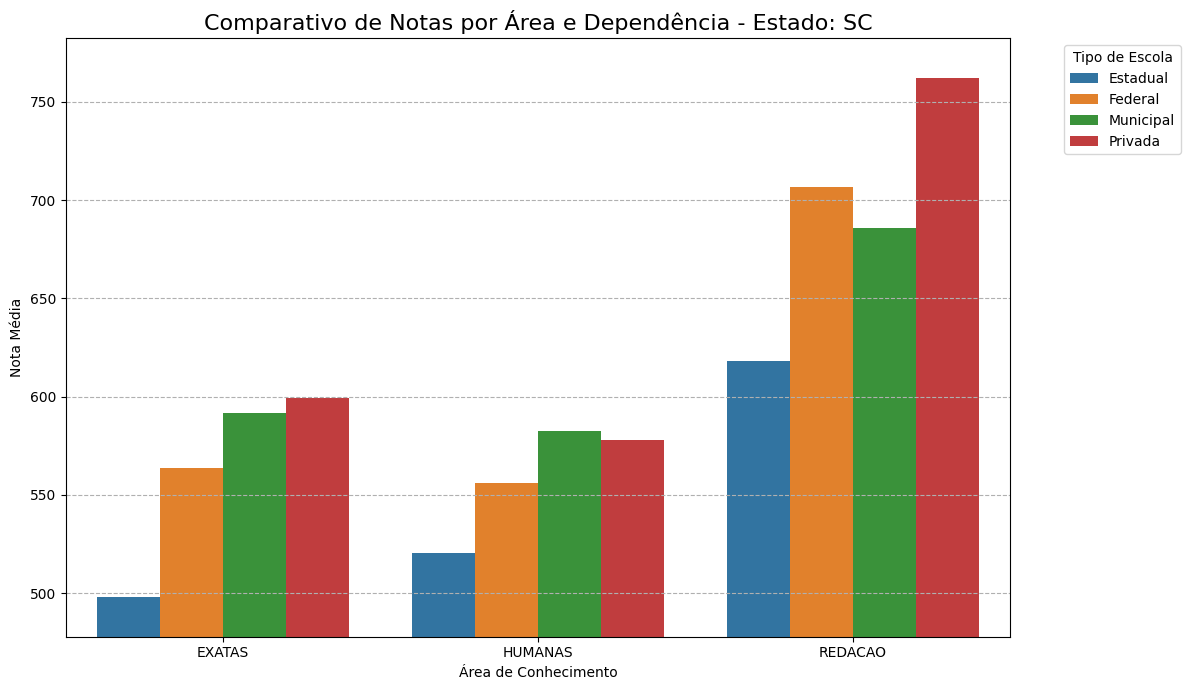

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mude o estado alvo aqui (ex: 'MG', 'DF', 'RJ')
ESTADO_ALVO = 'SC'

# Filtra o DataFrame apenas para o estado escolhido
df_alvo = df_plot_ready[df_plot_ready['SG_UF_PROVA'] == ESTADO_ALVO]

if df_alvo.empty:
    print(f"\n❌ Atenção: Não foram encontrados dados de escolas para o estado {ESTADO_ALVO} com esse filtro.")
else:
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=df_alvo,
        x='Area_de_Conhecimento',
        y='Nota_Media',
        hue='TP_DEPENDENCIA_ADM_NOME', # Define o agrupamento de cores
        palette='tab10'
    )

    plt.title(f'Comparativo de Notas por Área e Dependência - Estado: {ESTADO_ALVO}', fontsize=16)
    plt.xlabel('Área de Conhecimento')
    plt.ylabel('Nota Média')

    # Ajusta a escala Y para focar na diferença de notas
    y_min = df_alvo['Nota_Media'].min() - 20
    plt.ylim(y_min, df_alvo['Nota_Media'].max() + 20)

    plt.legend(title='Tipo de Escola', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

In [11]:
import pandas as pd
import numpy as np

# Nota: O código Plotly exige a variável 'media_por_estado' com as colunas de médias.
# Estou simulando o resultado do agrupamento de áreas de conhecimento por Estado.

# Dados brutos das 5 notas que você me forneceu anteriormente
data = {
    'NU_NOTA_CN_MEDIA': [475.79, 475.30, 471.05, 472.70, 476.38, 483.28, 517.11, 508.54, 494.66, 466.38, 509.04, 495.91, 490.18, 469.24, 484.29, 483.21, 472.88, 510.71, 505.82, 493.01, 481.04, 490.68, 503.11, 517.08, 481.71, 515.70, 475.60],
    'NU_NOTA_CH_MEDIA': [492.92, 489.05, 484.83, 490.55, 495.08, 501.72, 539.65, 530.05, 513.12, 479.34, 533.67, 513.77, 506.91, 483.10, 503.98, 502.24, 486.75, 529.37, 531.80, 512.61, 493.57, 503.76, 530.97, 539.57, 498.12, 539.63, 488.45],
    'NU_NOTA_LC_MEDIA': [509.54, 505.89, 502.55, 505.59, 510.76, 515.70, 548.77, 537.84, 525.05, 496.93, 540.11, 525.93, 520.52, 497.93, 516.87, 518.35, 504.76, 541.41, 540.85, 524.48, 509.20, 516.79, 542.79, 547.72, 512.30, 549.60, 506.92],
    'NU_NOTA_MT_MEDIA': [490.07, 505.54, 482.95, 479.70, 499.49, 525.65, 551.16, 546.25, 527.51, 488.01, 552.01, 524.05, 514.68, 484.53, 514.16, 520.67, 505.84, 541.23, 543.18, 521.18, 499.26, 503.08, 536.50, 552.85, 508.49, 559.89, 501.15],
    'NU_NOTA_REDACAO_MEDIA': [602.67, 601.36, 556.22, 593.33, 608.68, 626.47, 658.75, 662.35, 659.54, 598.74, 673.40, 618.30, 617.06, 594.05, 636.89, 623.47, 630.35, 634.07, 652.17, 638.41, 611.72, 585.16, 628.45, 660.63, 639.72, 659.43, 611.52]
}
indices = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']
df_temp = pd.DataFrame(data, index=indices)
df_temp.index.name = 'SG_UF_PROVA'

# Calcula as novas médias por área
df_temp['MEDIA_EXATAS'] = df_temp[['NU_NOTA_CN_MEDIA', 'NU_NOTA_MT_MEDIA']].mean(axis=1)
df_temp['MEDIA_HUMANAS'] = df_temp[['NU_NOTA_CH_MEDIA', 'NU_NOTA_LC_MEDIA']].mean(axis=1)
df_temp['MEDIA_REDACAO'] = df_temp['NU_NOTA_REDACAO_MEDIA']

# Seleciona apenas as 3 colunas que você deseja plotar
media_por_estado = df_temp[['MEDIA_EXATAS', 'MEDIA_HUMANAS', 'MEDIA_REDACAO']]

print("✅ Tabela 'media_por_estado' recriada com as 3 médias de áreas.")
print(media_por_estado.head())

✅ Tabela 'media_por_estado' recriada com as 3 médias de áreas.
             MEDIA_EXATAS  MEDIA_HUMANAS  MEDIA_REDACAO
SG_UF_PROVA                                            
AC                482.930         501.23         602.67
AL                490.420         497.47         601.36
AM                477.000         493.69         556.22
AP                476.200         498.07         593.33
BA                487.935         502.92         608.68


In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# --- 1. Recriação da Tabela de Médias por Área ---
# (Mantida a mesma lógica para garantir que o DataFrame seja recriado corretamente)
data = {
    'NU_NOTA_CN_MEDIA': [475.79, 475.30, 471.05, 472.70, 476.38, 483.28, 517.11, 508.54, 494.66, 466.38, 509.04, 495.91, 490.18, 469.24, 484.29, 483.21, 472.88, 510.71, 505.82, 493.01, 481.04, 490.68, 503.11, 517.08, 481.71, 515.70, 475.60],
    'NU_NOTA_CH_MEDIA': [492.92, 489.05, 484.83, 490.55, 495.08, 501.72, 539.65, 530.05, 513.12, 479.34, 533.67, 513.77, 506.91, 483.10, 503.98, 502.24, 486.75, 529.37, 531.80, 512.61, 493.57, 503.76, 530.97, 539.57, 498.12, 539.63, 488.45],
    'NU_NOTA_LC_MEDIA': [509.54, 505.89, 502.55, 505.59, 510.76, 515.70, 548.77, 537.84, 525.05, 496.93, 540.11, 525.93, 520.52, 497.93, 516.87, 518.35, 504.76, 541.41, 540.85, 524.48, 509.20, 516.79, 542.79, 547.72, 512.30, 549.60, 506.92],
    'NU_NOTA_MT_MEDIA': [490.07, 505.54, 482.95, 479.70, 499.49, 525.65, 551.16, 546.25, 527.51, 488.01, 552.01, 524.05, 514.68, 484.53, 514.16, 520.67, 505.84, 541.23, 543.18, 521.18, 499.26, 503.08, 536.50, 552.85, 508.49, 559.89, 501.15],
    'NU_NOTA_REDACAO_MEDIA': [602.67, 601.36, 556.22, 593.33, 608.68, 626.47, 658.75, 662.35, 659.54, 598.74, 673.40, 618.30, 617.06, 594.05, 636.89, 623.47, 630.35, 634.07, 652.17, 638.41, 611.72, 585.16, 628.45, 660.63, 639.72, 659.43, 611.52]
}
indices = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']
df_temp = pd.DataFrame(data, index=indices)
df_temp.index.name = 'SG_UF_PROVA'

df_temp['MEDIA_EXATAS'] = df_temp[['NU_NOTA_CN_MEDIA', 'NU_NOTA_MT_MEDIA']].mean(axis=1)
df_temp['MEDIA_HUMANAS'] = df_temp[['NU_NOTA_CH_MEDIA', 'NU_NOTA_LC_MEDIA']].mean(axis=1)
df_temp['MEDIA_REDACAO'] = df_temp['NU_NOTA_REDACAO_MEDIA']

media_por_estado = df_temp[['MEDIA_EXATAS', 'MEDIA_HUMANAS', 'MEDIA_REDACAO']]


# --- 2. CONFIGURAÇÃO DA ORDEM ALFABÉTICA ---

# 1. Converte o índice (UF) para coluna
df_plot = media_por_estado.reset_index()

# 2. Ordena o DataFrame pela coluna 'SG_UF_PROVA' (Ordem Alfabética)
# ascending=True é o padrão e garante A-Z
df_plot = df_plot.sort_values(by='SG_UF_PROVA', ascending=True)

# 3. Reorganiza os estados na ordem correta para Plotly
ordem_estados = df_plot['SG_UF_PROVA'].tolist()


# --- 3. Código Plotly Atualizado ---

fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=(
        "Média de Exatas (CN e MT)",
        "Média de Humanas (CH e LC)",
        "Média de Redação"
    ),
    shared_xaxes=False,
    vertical_spacing=0.08
)

# Adicionar cada média como um gráfico de barras
fig.add_trace(go.Bar(x=df_plot['SG_UF_PROVA'], y=df_plot['MEDIA_EXATAS'], name='Exatas', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Bar(x=df_plot['SG_UF_PROVA'], y=df_plot['MEDIA_HUMANAS'], name='Humanas', marker_color='#ff7f0e'), row=2, col=1)
fig.add_trace(go.Bar(x=df_plot['SG_UF_PROVA'], y=df_plot['MEDIA_REDACAO'], name='Redação', marker_color='#2ca02c'), row=3, col=1)

# Configurar o layout geral
fig.update_layout(
    height=900,
    width=900,
    title_text="Média das Notas por Área de Conhecimento e por Estado (UF da Prova)",
    showlegend=False,
)

# Rótulos do eixo Y (Notas) e seus intervalos
fig.update_yaxes(title_text="Nota Média", range=[450, 700], row=1, col=1)
fig.update_yaxes(title_text="Nota Média", range=[450, 700], row=2, col=1)
fig.update_yaxes(title_text="Nota Média", range=[450, 700], row=3, col=1)


# Atualizar os eixos X para CADA subplot individualmente (Forçando a ordem alfabética)
for i in range(1, 4):
    fig.update_xaxes(
        title_text="Sigla do Estado (UF)",
        showticklabels=True,
        # AQUI usamos o categoryorder='array' com a ordem alfabética
        categoryorder='array',
        categoryarray=ordem_estados,
        row=i, col=1
    )


# Exibir o gráfico
fig.show()